Моделирование гонки вооружений между двумя странами

In [4]:
import matplotlib.pyplot as plt # графики
import numpy as np # массивы
from scipy.integrate import odeint # ОДУ

In [11]:
b = [1, 2] # скорость «старения» вооружений 
a = [4, 1] # скорость наращивания вооружений
g = [500, 300] # уровень настороженности 

print("Коэффициенты:\nb1*b2 = {0:.1f}".format(float(b[0]*b[1])))
print("a1*a2 = {0:.1f}".format(float(a[0]*a[1])))
print("g1 = {0:.1f}, g2 = {1:.1f}".format(g[0], g[1]))

'''M1 = []
M2 = []
for i in range(16):
    M1.append(1600 - i*100)
    M1.append(i*100)
    M2.append(i*100)
    M2.append(1600 - i*100)'''

# начальные значения объёмов вооружений
M1 = [100, 200, 400, 500, 700, 800, 1000, 1500, 1400, 1100, 1000, 900, 700, 500]
M2 = [1000, 900, 700, 600, 300, 200, 0, 500, 600, 800, 1000, 1200, 1300, 1500]

Коэффициенты:
b1*b2 = 2.0
a1*a2 = 4.0
g1 = 500.0, g2 = 300.0


In [6]:
if (b[0]*b[1] - a[0]*a[1] != 0):
    exist = True
    # положение равновесия первой страны
    M1_0 = (a[0]*g[1] + b[1]*g[0])/(b[0]*b[1] - a[0]*a[1]) 
    # положение равновесия второй страны
    M2_0 = (a[1]*g[0] + b[0]*g[1])/(b[0]*b[1] - a[0]*a[1]) 
    print("Положение равновесия первой страны = {0:.2f}".format(float(M1_0)))
    print("Положение равновесия второй страны = {0:.2f}".format(float(M2_0)))
else:
    exist = False
    print("Положения равновесия не существует")

x = np.linspace(0, 3000, 1000) # массив значений от 0 до 3000 (1000 точек)
if (b[1] != 0):
    iso_zero = a[1]/b[1]*x + g[1]/b[1] # изоклина нуля
if (a[0] != 0):
    iso_NaN = b[0]/a[0]*x - g[0]/a[0] # изоклина бесконечности

Положение равновесия первой страны = -1100.00
Положение равновесия второй страны = -400.00


In [7]:
# задаём правую часть системы ОДУ
def f(m, t, a, b, g):
    dM1dt = a[0]*m[1] - b[0]*m[0] + g[0]
    dM2dt = a[1]*m[0] - b[1]*m[1] + g[1]
    return [dM1dt, dM2dt]

t = np.linspace(0, 3, 1000) # массив значений от 0 до 3 (1000 точек)
if (exist):
    m0 = [M1_0, M2_0] # начальные значения
    sol0 = odeint(f, m0, t, args=(a,b,g)) 

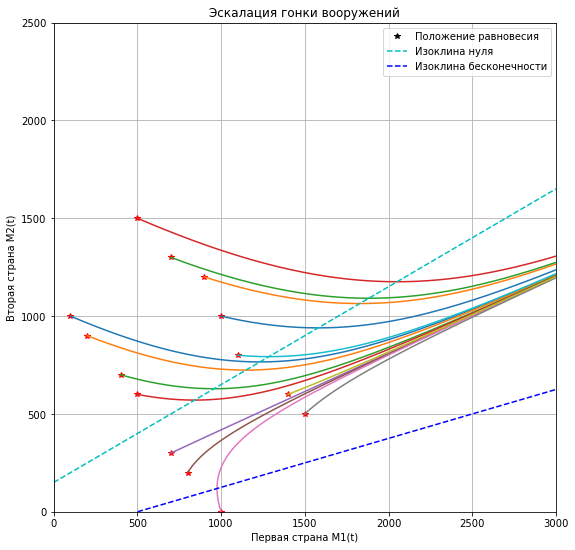

In [8]:
plt.figure(figsize=(9, 9))
if (b[0]*b[1] > a[0]*a[1]):
    plt.title("Равновесная гонка вооружений") # заголовок
    if (g[0] == 0 and g[1] == 0):
        plt.title("Полное разоружение") # заголовок
if (b[0]*b[1] < a[0]*a[1]):
    plt.title("Эскалация гонки вооружений") # заголовок
if (b[0]*b[1] == a[0]*a[1]):
    plt.title("Отсутствие аналитического положения равновесия") # заголовок
plt.xlabel("Первая страна M1(t)") # ось абсцисс
plt.ylabel("Вторая страна M2(t)") # ось ординат
plt.grid() # включение отображение сетки
plt.axis([0, 3000, 0, 2500])

for i in range(len(M1)):
    m0 = [M1[i], M2[i]]
    plt.plot(m0[0], m0[1], '*r')
    sol = odeint(f, m0, t, args=(a,b,g))
    plt.plot(sol[:, 0], sol[:, 1])

if (exist):
    plt.plot(M1_0, M2_0, 'k*', label = "Положение равновесия")    
if (b[1] != 0):
    plt.plot(x, iso_zero, '--c', label = "Изоклина нуля")
if (a[0] != 0):
    plt.plot(x, iso_NaN, '--b', label = "Изоклина бесконечности")
plt.legend()
plt.show()

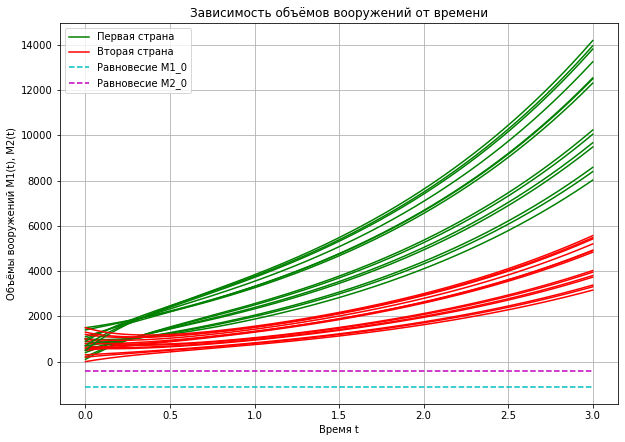

In [9]:
plt.figure(figsize=(10, 7))
plt.title("Зависимость объёмов вооружений от времени") # заголовок
plt.xlabel("Время t") # ось абсцисс
plt.ylabel("Объёмы вооружений M1(t), M2(t)") # ось ординат
plt.grid() # включение отображение сетки
#plt.axis([-0.05, 2, -0.1, 1500])

for i in range(len(M1)):
    m0 = [M1[i], M2[i]]
    sol = odeint(f, m0, t, args=(a,b,g))
    line1, = plt.plot(t, sol[:, 0], 'g')
    line2, = plt.plot(t, sol[:, 1], 'r')

if (exist):
    line3, = plt.plot(t, sol0[:, 0], '--c')
    line4, = plt.plot(t, sol0[:, 1], '--m')
    plt.legend((line1, line2, line3, line4), ["Первая страна", "Вторая страна", "Равновесие M1_0", "Равновесие M2_0"])
else:
    plt.legend((line1, line2), ["Первая страна", "Вторая страна"])
plt.show()